### import libs

In [2]:
import numpy as np
import matplotlib.image as mpimg  # for reading in images

import matplotlib.pyplot as plt
import cv2  # computer vision library

%matplotlib inline

### Read in and display the image

Image dimensions: (2250, 3000, 3)


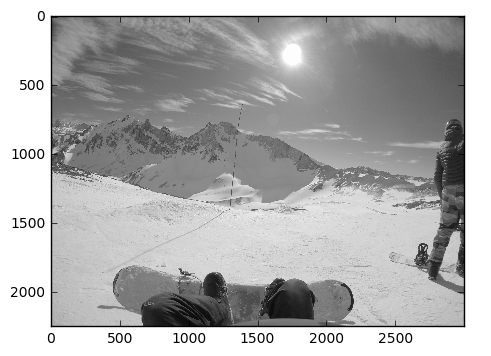

In [3]:
# Read in the image with mpimg
image = mpimg.imread('data/G0051913.JPG')

# Print out the image dimensions
print('Image dimensions:', image.shape)

# Change from color to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

#plot it
plt.imshow(gray_image, cmap='gray')

In [4]:
# Print specific grayscale pixel values and find the maximum and minimum grayscale values

x = 400
y = 300

max_val = np.amax(gray_image)
min_val = np.amin(gray_image)

print(gray_image[y,x])
print('Max: ', max_val)
print('Min: ', min_val)

106
Max:  255
Min:  1


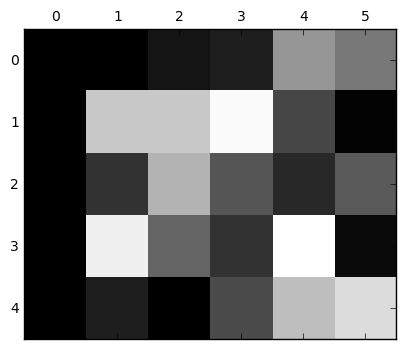

In [5]:
# Create a 6x6 image using just grayscale, numerical values
tiny_image = np.array([[0,0, 20, 30, 150, 120],
                      [0,200, 200, 250, 70, 3],
                      [0,50, 180, 85, 40, 90],
                      [0,240, 100, 50, 255, 10],
                      [0,30, 0, 75, 190, 220]])

# To show the pixel grid, use matshow
plt.matshow(tiny_image, cmap='gray')

### RGB channels 

Visualize the levels of each color channel

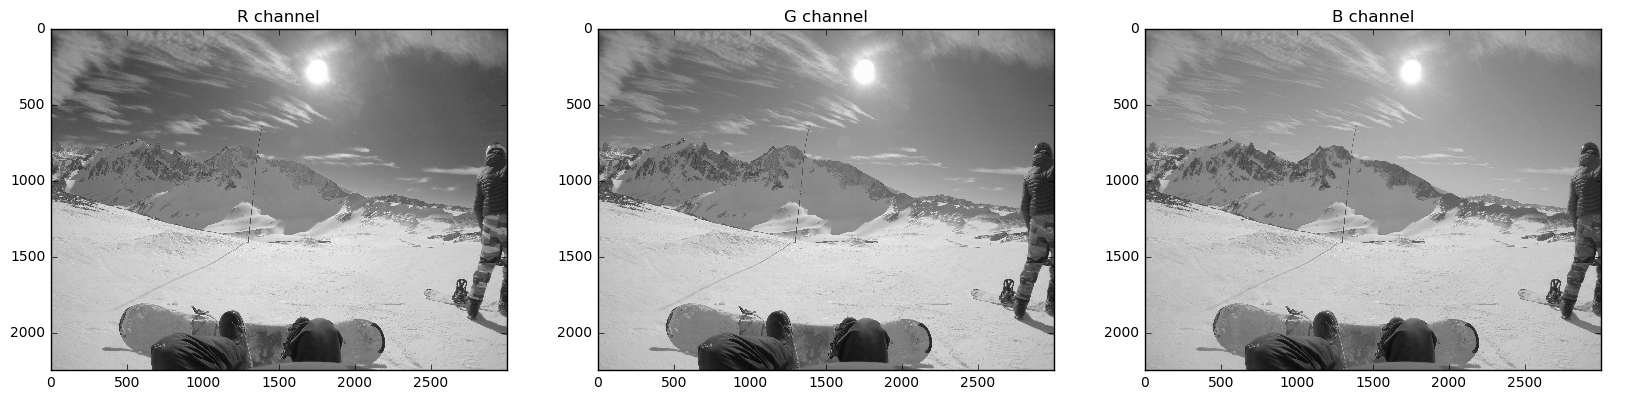

In [6]:
# Isolate RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

# Visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('R channel')
ax1.imshow(r, cmap='gray')
ax2.set_title('G channel')
ax2.imshow(g, cmap='gray')
ax3.set_title('B channel')
ax3.imshow(b, cmap='gray')


# Color threshold, green screen

This image is: <class 'numpy.ndarray'>  with dimensions: (480, 852, 3)


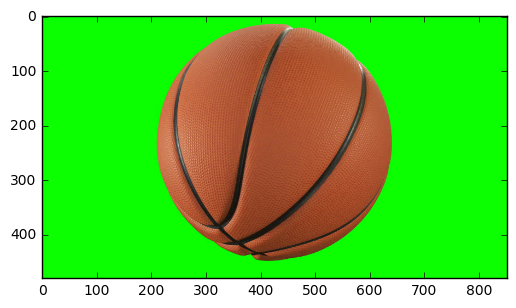

In [7]:
# Read image with one color background
image = cv2.imread('data/basketball_green_bkgd.jpg')

# Print out the type of image data and its dimensions (height, width, and color)
print('This image is:', type(image), 
      ' with dimensions:', image.shape)
# Make a copy of the image and change color to RGB (from BGR)
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

### Define the color threshold and create mask

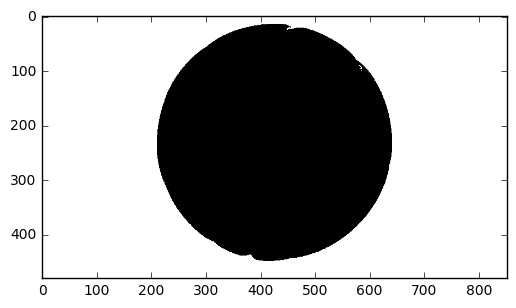

In [8]:
#play around with these values until you isolate the green background
#[R,G,B]
lower_green = np.array([0,200,0]) 
upper_green = np.array([240,255,240])

# Define the masked area
mask = cv2.inRange(image_copy, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

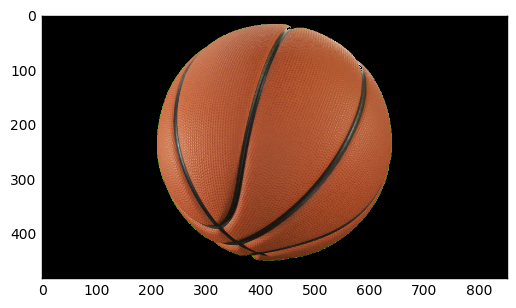

In [9]:
# Mask the image to let the ball show through
masked_image = np.copy(image_copy)
masked_image[mask != 0] = [0, 0, 0]

plt.imshow(masked_image)

### Mask and add a background image

Resized Dimensions :  (480, 852, 3)


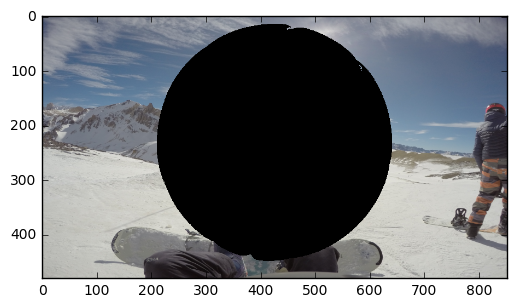

In [10]:
# Load in a background image, and convert it to RGB 
bkgrd = cv2.imread('data/G0051913.JPG')
bkgrd = cv2.cvtColor(bkgrd, cv2.COLOR_BGR2RGB)

# Crop it to the right size (514x816)
width = int(image_copy.shape[1])
height = int(image_copy.shape[0])
dim = (width, height)
# resize image
bkgrd_resized = cv2.resize(bkgrd, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',bkgrd_resized.shape)
plt.imshow(image_copy)

# Mask the cropped background so that the ball area is blocked
bkgrd_resized[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(bkgrd_resized)

### Create a complete image

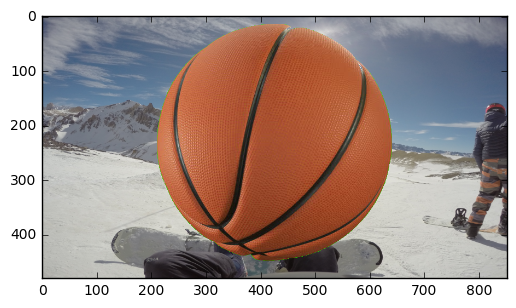

In [11]:
# Add the two images together to create a complete image!
complete_image = masked_image + bkgrd_resized

# Display the result
plt.imshow(complete_image)

### Save the new image

In [12]:
filename = 'data/snowboard_ball.jpg'
complete_image = cv2.cvtColor(complete_image, cv2.COLOR_RGB2BGR)
cv2.imwrite(filename, complete_image)

True

# HSV Color Space, Balloons

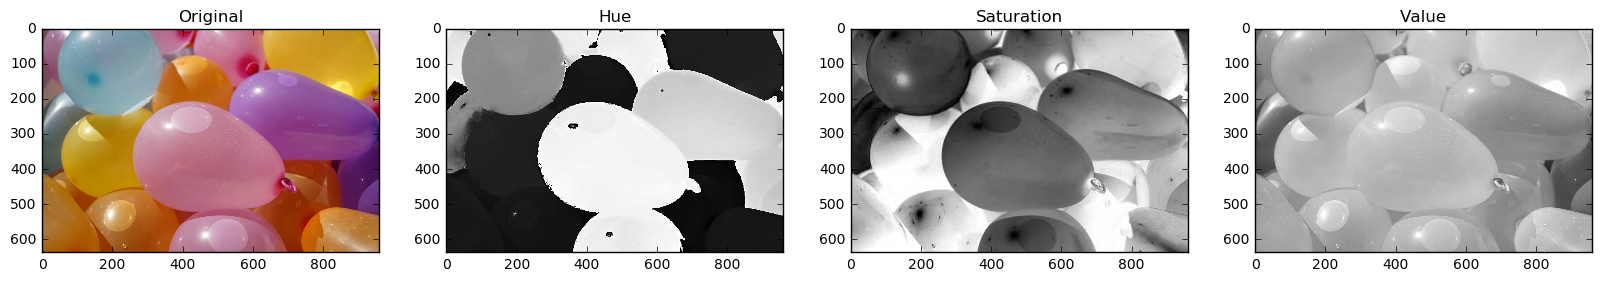

In [14]:
image = cv2.imread('data/water_balloons.jpg')
ballons_copy = np.copy(image)

# Convert from BGR to HSV
hsv = cv2.cvtColor(ballons_copy, cv2.COLOR_BGR2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))

ax1.set_title('Original')
ax1.imshow(ballons_copy[:,:,::-1])

ax2.set_title('Hue')
ax2.imshow(h, cmap='gray')

ax3.set_title('Saturation')
ax3.imshow(s, cmap='gray')

ax4.set_title('Value')
ax4.imshow(v, cmap='gray')

### Define hue selection thresholds for any color
First get the color you want in [HTML Color Picker](https://www.w3schools.com/colors/colors_picker.asp)



In [23]:
blue = np.uint8([[[255,0,0]]])
hsv_blue = cv2.cvtColor(blue,cv2.COLOR_BGR2HSV)
print(hsv_blue)

[[[120 255 255]]]


In [30]:
# Now you take [H-10, 0,0] and [H+10, 255, 255]
# to define our color selection criteria in HSV values to detect pink
lower_hue = np.array([90,0,0]) 
upper_hue = np.array([130,255,255])

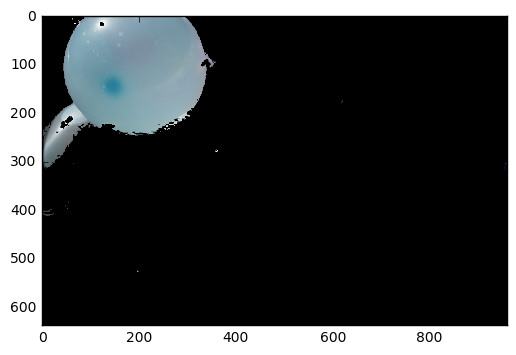

In [31]:
# Now try HSV!

# Define the masked area in HSV space
mask_hsv = cv2.inRange(hsv, lower_hue, upper_hue)

# mask the image
masked_image = np.copy(image)
masked_image[mask_hsv==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image[:,:,::-1])